# Finding Heavy Traffic Indicators on I-94
In this project, we will analyze the I-94 Traffic dataset and generate exploratory visualizations using Matplotlib and Seaborn.

The goal of our analysis is to identify indicators of heavy traffic on I-94. This could be weather type, time of day, time of week, etc, that may be an omen for heavy traffic.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [28]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


First observations:
- 48,204 rows, 9 columns
- No columns with missing values

Data collection context:
- Data collected by a station midway between Minneapolis and Saint Paul
- Station only records westbound traffic
- Analysis results will be in the scope of westbound traffic in the proximity of the station


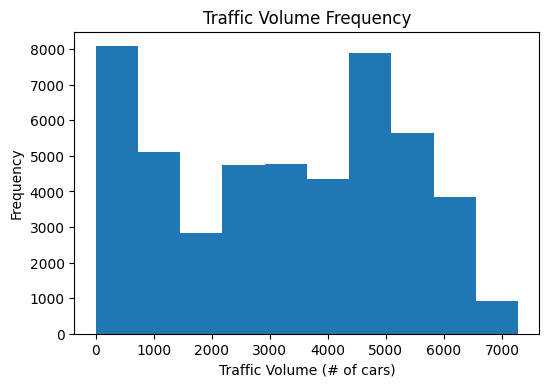

In [29]:
plt.hist(traffic['traffic_volume'])
plt.xlabel('Traffic Volume (# of cars)')
plt.ylabel('Frequency')
plt.title('Traffic Volume Frequency')
plt.show()

In [30]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Observations
- The most frequent volumes are between 0-600 and 4500-5150
- Least frequent volumes are between 6500-7200 and 1200-2100
- Reported volume frequencies peak at 0-600 and 4500-5150 and decrease from the peaks. At a given moment, traffic volume is likely within or close to those intervals- which interval it is likely close to is likely related to the time of day or working hours.
- The volumes 0-1500 likely pertain to past midnight hours to early mornings
- The volumes 4500-5600 likely pertain to rush-hour right out of work
- No particular shape- uneven, asymmetrical distribution

In [31]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [32]:
hour = traffic['date_time'].dt.hour
day_traffic = traffic.copy()[hour.between(7,18)]
night_traffic = traffic.copy()[~(hour.between(7,18))]
print(day_traffic.shape[0])
print(night_traffic.shape[0])

23877
24327


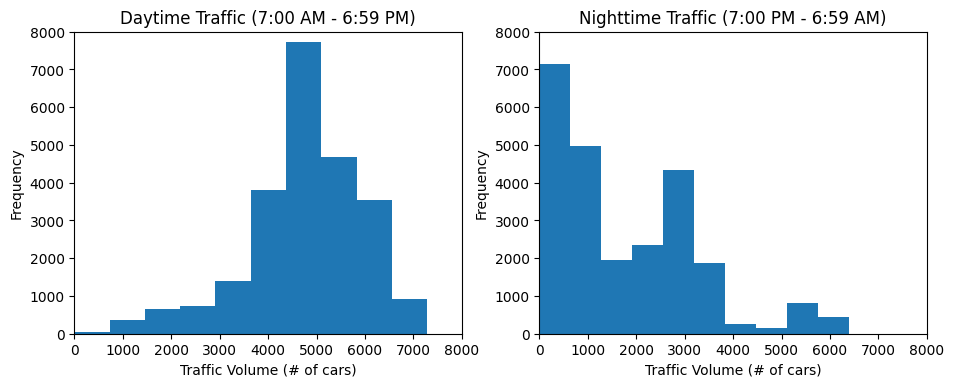

In [33]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
plt.hist(day_traffic['traffic_volume'])
plt.xlabel('Traffic Volume (# of cars)')
plt.ylabel('Frequency')
plt.title('Daytime Traffic (7:00 AM - 6:59 PM)')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplot(1,2,2)
plt.hist(night_traffic['traffic_volume'])
plt.xlabel('Traffic Volume (# of cars)')
plt.ylabel('Frequency')
plt.title('Nighttime Traffic (7:00 PM - 6:59 AM)')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.show()

In [34]:
day_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [35]:
night_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Daytime Traffic Observations
- Daytime traffic volume has skew left distribution with its most frequently reported volumes within 4200-5100
- 25% of the reported volumes are < 4252
- 25% of the reported volumes are > 5559

Nighttime Traffic Observations
- Nighttime traffic volume has skew right distribution with its most frequently reported volumes within 0-600
- 25% of the reported volumes are < 530
- 25% of the reported volumes are > 2819

25% of daytime traffic volumes are almost double of 75% of nighttime traffic volumes- traffic at night is very light compared to traffic during the day. Very rarely does nighttime traffic volume surpass even 50% of overall traffic volumes, to be generous.

In [36]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

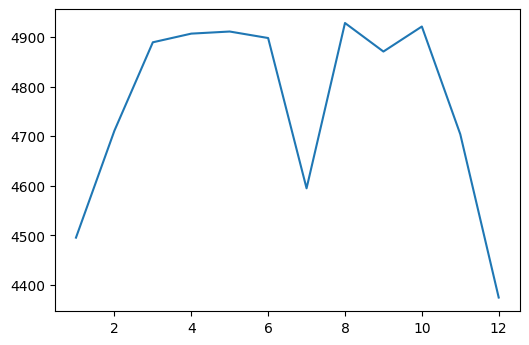

In [44]:
plt.plot(by_month.index, by_month['traffic_volume'])
plt.show

Observations
- Lower average volumes in December-January, likely due to less work-related traffic during holidays such as Christmas, New Years, Winter and Spring breaks
- A sharp dip from June-July followed by a sharp rise back up from July-August likely coincides with summer vacation
- Because all the averages are high in numeric value (>=4400) differences in averages seem small when just looking at the groupby means. Line plot makes the differences in averages per month clearer


In [45]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
by_week = day_traffic.groupby('dayofweek').mean()
by_week['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

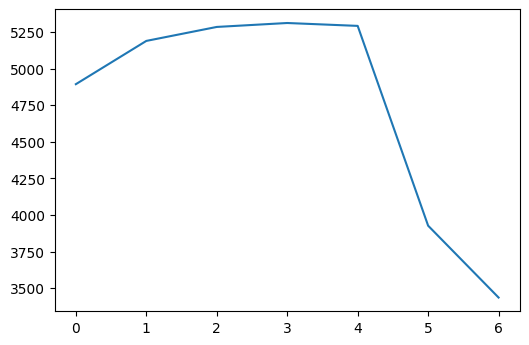

In [46]:
plt.plot(by_week.index, by_week['traffic_volume'])
plt.show

Observations
- Consistently high values for typical working days Monday-Friday
- Dips sharply after friday likely due to those spending their weekends off at home
- Monday is likely lower than Tuesday-Friday due to those skipping work or school after a long weekend

In [48]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
business_days = day_traffic[day_traffic['dayofweek'] <= 4]
weekend = day_traffic[day_traffic['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


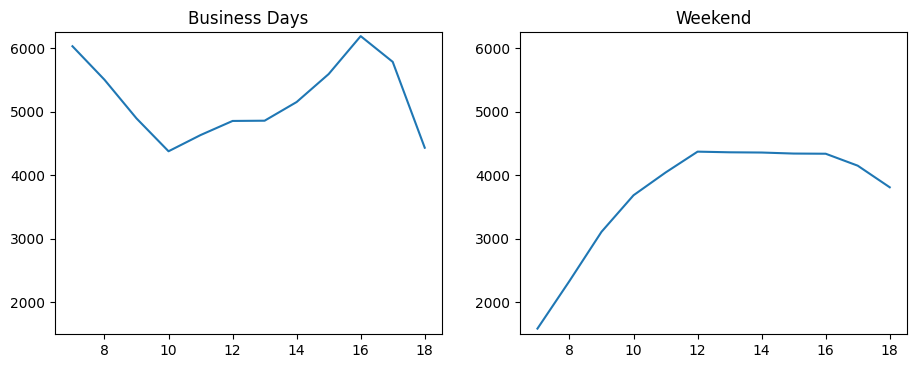

In [54]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(by_hour_business.index, by_hour_business['traffic_volume'])
plt.title('Business Days')
plt.ylim([1500,6250])

plt.subplot(1,2,2)
plt.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'])
plt.title('Weekend')
plt.ylim([1500,6250])

plt.show()

Observations
- Business days traffic volumes are almost always higher than Weekend traffic volumes at any time between 7AM to 6PM

Business day observations
- Traffic volumes are highest at 7AM and 4PM likely due to people driving to and from work
- Common 40-hour work week hours are 8AM - 4PM or 9AM - 5PM. The lowest points are around 10AM and 6PM when people those working at 8 or 9 are all at work and those who get out at 4 or 5 have all gotten home
- Average volume begins to increase from 12PM - 2PM which may be linked to those going out for lunch
- The rush hours on business days are 7AM and 4PM

Weekend observations
- Traffic volumes don't peak until 12PM compared to business days peaking early at 7AM likely due to people sleeping in or going out around lunch time to eat/spend their day
- Traffic volumes stay consistently up until they start to decline around 4PM

### Time Indicators
In the scope of westbound traffic volume on I-94, in proximity of midway between Minneapolis and Saint Paul, during daytime hours 7:00 AM - 6:59 PM:  
By month:
- The lowest volumes occur from December to January, likely due to frequent holidays and breaks including Christmas, New Years, winter break, etc. that are time off work
- Average volumes dip from June-July and rise back up from July-August for similar reasons due to summer breaks/vacations 
- On average, volumes are higher on warm months Mar-Oct than on cold months Nov-Feb

By day of the week:
- Business days Mon-Fri experience consistently higher volumes than the weekends Sat-Sun likely due to people working typical 40-hour work weeks
- Volume on Mondays are slightly lower than Tue-Friday likely due to some skipping work after a long weekend
- Low volumes for the weekends likely due to workers spending more time at home instead of commuting to and from work
- Saturdays have higher average volumes than Sundays likely because Saturdays people stay out late whereas Sundays they sleep early for work the next day

By hour per business day vs. weekend:
- Traffic volume is almost always higher at any given daytime hour on a business day than on a weekend
- Rush hours are 7AM and 4PM on business days
- Weekend volumes don't peak until later at 12PM likely due to people sleeping in or not needing to go out until lunchtime


In [65]:
day_traffic.corr().loc['temp':'clouds_all','traffic_volume']

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

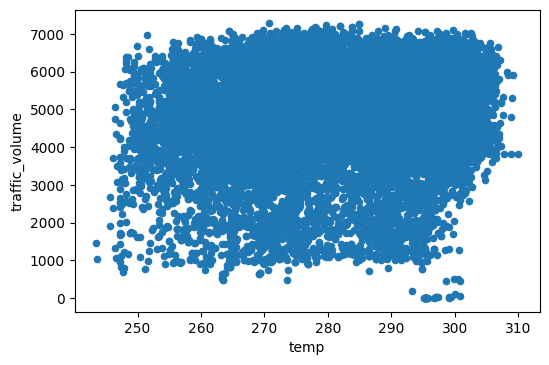

In [71]:
day_traffic = day_traffic[day_traffic['temp'].between(243,311)]
day_traffic.plot.scatter(x='', y='traffic_volume')

The numerical weather columns have virtually no correlation to traffic volume and are therefore not reliable indicators for heavy traffic.

In [74]:
print(day_traffic['weather_main'].value_counts(),'\n')
print(day_traffic['weather_description'].value_counts())

Clouds          8702
Clear           5742
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: weather_main, dtype: int64 

sky is clear                           4890
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain          

In [79]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_desc = day_traffic.groupby('weather_description').mean()

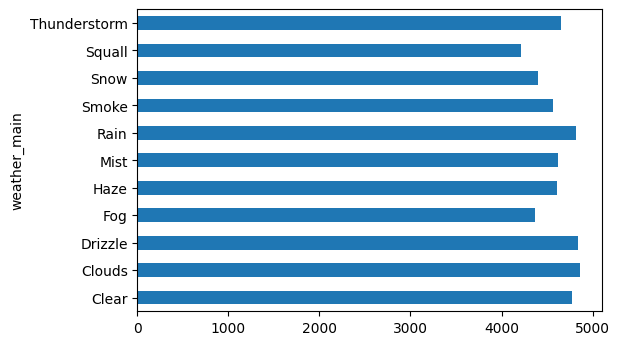

In [83]:
by_weather_main['traffic_volume'].plot.barh()

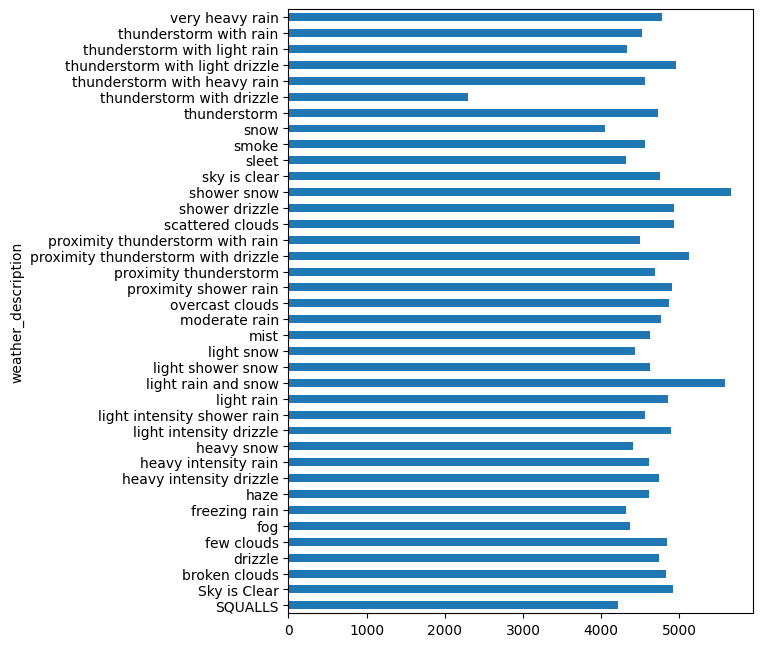

In [94]:
by_weather_desc['traffic_volume'].plot.barh(figsize=(6,8))

Observations:
- Most weather conditions in weather_main and weather_desc are associated with traffic volumes of <=5000 with two exceptions being the 'light rain and snow' and 'proximity thunderstorm with rain' values in the 'weather_description' column exceeding a volume of 5000
- A weather description of 'light rain and snow' or 'proximity thunderstorm with rain' is a heavy traffic indicator

### Conclusion
In the scope of westbound traffic volume on I-94, in proximity of midway between Minneapolis and Saint Paul, during daytime hours 7:00 AM - 6:59 PM, we have identified several heavy traffic indicators:  
Time indicators:
- Daytime traffic significantly heavier than nighttime
- Business days (Mon-Fri)
- Rush hours of 7AM and 4PM on business days

Weather indicators:
- Warm months (Mar-Oct)
- A weather description of light rain and snow
- A weather description of proximity thunderstorm with rain